# Regression Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [3]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [4]:
#!pip install tensorflow
#!pip install keras

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [6]:

# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(12, activation = 'tanh', input_dim = 11))

# Adding the second hidden layer
rnn.add(Dense(7, activation = 'tanh'))


# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])


In [7]:
# Fitting the ANN to the Training set
k = rnn.fit(X_train, y_train, batch_size = 10, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 108ms/step - loss: 1.6568 - accuracy: 0.0000e+00 - val_loss: 4.5950 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 1.5792 - accuracy: 0.0000e+00 - val_loss: 4.5113 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 1.5122 - accuracy: 0.0000e+00 - val_loss: 4.4514 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 1.4508 - accuracy: 0.0000e+00 - val_loss: 4.4043 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 1.3996 - accuracy: 0.0000e+00 - val_loss: 4.3604 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 1.3364 - accuracy: 0.0000e+00 - val_loss: 4.3077 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 24ms/step - loss: 1.2919 - accuracy: 0.0000e+00 - val_los

4/4 [==============================] - 0s 10ms/step - loss: 0.5448 - accuracy: 0.0000e+00 - val_loss: 3.7704 - val_accuracy: 0.0000e+00
Epoch 57/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5383 - accuracy: 0.0000e+00 - val_loss: 3.7743 - val_accuracy: 0.0000e+00
Epoch 58/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5326 - accuracy: 0.0000e+00 - val_loss: 3.7743 - val_accuracy: 0.0000e+00
Epoch 59/100
4/4 [==============================] - 0s 18ms/step - loss: 0.5271 - accuracy: 0.0000e+00 - val_loss: 3.7842 - val_accuracy: 0.0000e+00
Epoch 60/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5221 - accuracy: 0.0000e+00 - val_loss: 3.7909 - val_accuracy: 0.0000e+00
Epoch 61/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5170 - accuracy: 0.0000e+00 - val_loss: 3.7867 - val_accuracy: 0.0000e+00
Epoch 62/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5102 - accuracy: 0.0000e+00 - val_loss: 3.79

In [8]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

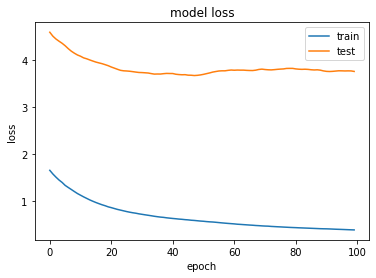

In [9]:

# Plotting loss & accuracy
plt.figure()
plt.plot(k.history['loss'])
plt.plot(k.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Для данной модели был проведен опят с числом batch_size. На более 10 тестовая и обучающая выборки на всех эпохах не пересекаются, а значит модель переобучена всем интервале. Минимальный разрыв наблюдается примерно на 5 эпохах. Однако при batch_size = 8 - качество несколько хуже. Построим соответсвующую модель.

In [10]:
# Initialising the ANN
rnn1 = Sequential()

# Adding the input layer and the first hidden layer
rnn1.add(Dense(12, activation = 'tanh', input_dim = 11))


# Adding the third hidden layer
rnn1.add(Dense(7, activation = 'tanh'))

# Adding the output layer
rnn1.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [11]:
# Fitting the ANN to the Training set
k1 = rnn1.fit(X_train, y_train, batch_size = 10, validation_data=(X_test, y_test), epochs = 5)

Epoch 1/5
4/4 [==============================] - 1s 100ms/step - loss: 1.5196 - accuracy: 0.0000e+00 - val_loss: 2.7075 - val_accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 0s 19ms/step - loss: 1.4321 - accuracy: 0.0000e+00 - val_loss: 2.6792 - val_accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 0s 20ms/step - loss: 1.3605 - accuracy: 0.0000e+00 - val_loss: 2.6452 - val_accuracy: 0.0000e+00
Epoch 4/5
4/4 [==============================] - 0s 13ms/step - loss: 1.3006 - accuracy: 0.0000e+00 - val_loss: 2.6136 - val_accuracy: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 0s 13ms/step - loss: 1.2538 - accuracy: 0.0000e+00 - val_loss: 2.5872 - val_accuracy: 0.0000e+00


In [12]:

# Predicting the Test set results
y_pred1 = rnn1.predict(X_test)

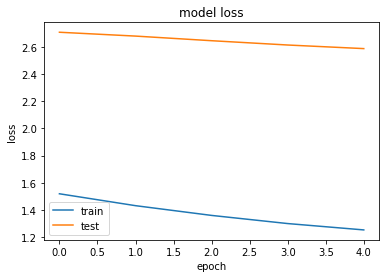

In [13]:

# Plotting loss & accuracy
plt.figure()
plt.plot(k1.history['loss'])
plt.plot(k1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [14]:

# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_hat1 = sc_y.inverse_transform(y_pred1)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [15]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(0.296, 0.922)

In [16]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn1.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat1, squared=False).round(3)

(0.524, 0.765)

In [17]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat1 = sc_y.inverse_transform(y_pred1)
y_test1 = sc_y.inverse_transform(y_test)
X_test1 = sc_X.inverse_transform(X_test)

ВЫВОДЫ: как мы видим, НС справилась со своей задачей не наилучшим образом. Получены сопоставимы оценки и модель не сильно переобучена. Однако метод Recursive feature elimination в модели Множественной регресси выдал примерно такие же сопоставимые результаты, однако с меньшим MSE. Таким образом для дальнейшей работы следует использовать именно этот метод. Однако, следует заметить, что входных данных достатоточно маленькое число (возможно число предикторов и способно построить модель высокого уровня, однако количество наблюдений совсем маленькое). Таким образом, данную модель сложно использовать для корректной дальнейшей работы, но при внесении дополнительной информации получится интересное исследование поведения потребителей.

Так же была построена НС на наиболее значимых переменных. Выводы про нее смотреть в соответствующем файле.